# INF200 Lecture No 11

###  21 November 2022

## Today's topics

1. Administrativa
1. Plotting with Matplotlib
1. Machine learning with scikit-learn
1. Optimization
    1. Algorithm analysis
    
### Note

The precise results of the benchmarks given in this notebook will vary depending on computer type and load. The factors describing differences in runtime are therefore only approximations.


-----------

# Adminstrativa

- **Virtual lecture 28 November**
    - Material will be posted on Canvas
    - View it on your own
- Check lists of project teams on Canvas!
    - https://nmbu.instructure.com/courses/8544/pages/block-and-team-assignment
    - If your name is **not on the list, you cannot participate in the project and cannot get a grade!**
    - Contact Plesser immediately if you think you should be on one of the lists
- If you fail the exam in January, you **cannot** try again in June.
- Final physical lecture Monday, **5** December.
- January block
    - Will begin Monday, 9 January 2023, at 09.15, in Festsalen, Samfunnet.
    - Exam on Mon/Tue 30/31 January, two exam commissions.

--------------

# Plotting: Matplotlib

- Currently the most widely used plotting package for scientific Python
- Many other graphics packages build on it
- See
    - https://matplotlib.org
    - https://matplotlib.org/gallery/index.html
- New (free) book: Nicolas P. Rougier, *Scientific Visualization: Python + Matplotlib* (https://github.com/rougier/scientific-visualization-book)
- Two different approaches
    - scripting style
    - object-oriented style
- We will look at the scripting style first

## Configuration

- We set a quite wide and low figure format

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Set figure size to suitable format for notebook. Size is in inches (2.54 cm/inch).

In [2]:
plt.rcParams['figure.figsize'] = (10, 3)

##### rcParams shows all configurable parameters

In [3]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

## Examples

### Single function, default style

- `;` after last line to suppress output of `__repr__` of return value of last command

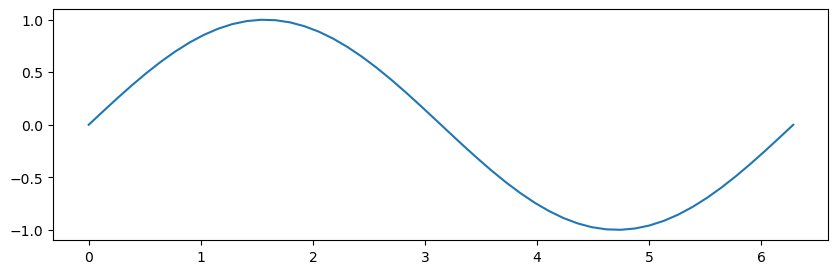

In [4]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
plt.plot(x, y);

- We can use [$\LaTeX$](http://no.wikipedia.org/wiki/LaTeX) formatting for nicer figure labels
- Strings with $\LaTeX$ codes should be raw strings, so that backslashes cause no problems
- Matplotlib can handle most LaTeX internally (left figure)
- By using the full LaTeX engine in the background, typesetting can be even prettier and one has the full power of LaTeX available (right figure)
- See also 
    - https://matplotlib.org/stable/tutorials/text/usetex.html
    - https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html
- **Note:** For plotting with $\LaTeX$, you have to have $\LaTeX$ installed on your computer
    - Windows: https://miktex.org/
    - macOS: https://www.tug.org/mactex/
    - Linux: from package manager

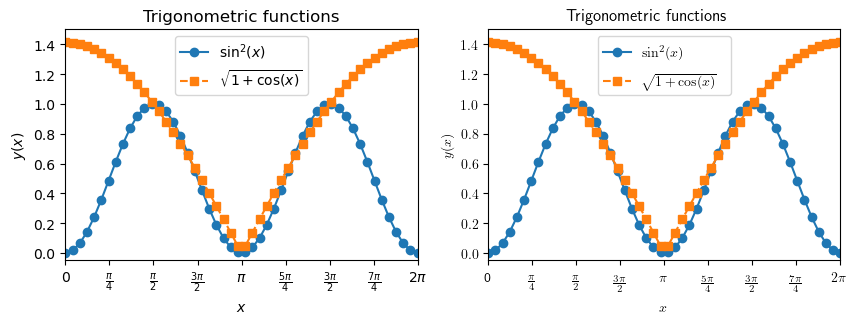

In [5]:
def sample_plot():
    plt.plot(x, np.sin(x)**2, 'o-', label=r'$\sin^2(x)$');
    plt.plot(x, np.sqrt(1+np.cos(x)), 's--', label=r'$\sqrt{1+\cos(x)}$');
    plt.legend();
    plt.xlabel('$x$');
    plt.ylabel('$y(x)$');
    plt.title('Trigonometric functions');
    plt.xticks(np.linspace(0, 2, 9) * np.pi,
               ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{2}$', r'$\pi$',
                r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']);
    plt.xlim(0, 2*np.pi);
    plt.ylim(-0.05, 1.5);

plt.subplot(1, 2, 1)
sample_plot()

# use LaTeX for typesetting, must be set before subplot()
plt.rcParams['text.usetex'] = True    
plt.subplot(1, 2, 2)
sample_plot()
plt.rcParams['text.usetex'] = False   # reset to default

plt.savefig('trigfuncs.png');
plt.savefig('trigfuncs.pdf');

### Output to file

- `savefig` should be called in same notebook cell as plot commands
- Generally prefer vector graphics: 'pdf', 'svg'
- In some cases raster graphics (`png`, `gif`) may be useful, but they incur a loss of quality
- `jpg` is *not* a suitable format for line graphics
- Create figures in the size you want to include them in your document

### Object-oriented Matplotlib

- Generally recommended, especially in larger scripts
- Allows for more control, since we handle objects in graphic explicitly

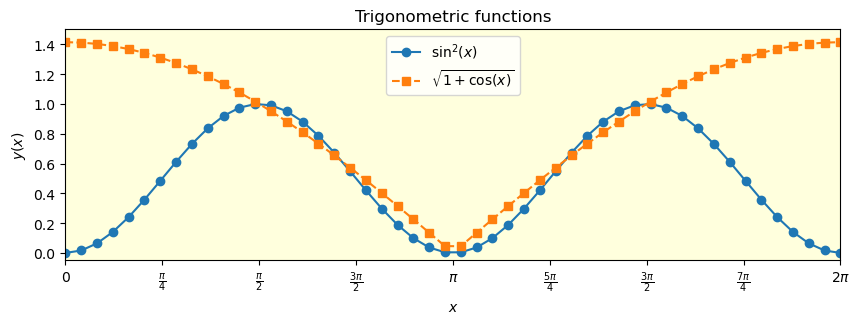

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor='#ffffdd')

line1 = ax.plot(x, np.sin(x)**2, 'o-', label=r'$\sin^2(x)$');
line2 = ax.plot(x, np.sqrt(1+np.cos(x)), 's--', label=r'$\sqrt{1+\cos(x)}$');
ax.legend();
ax.set_xlabel('$x$');
ax.set_ylabel('$y(x)$');
ax.set_title('Trigonometric functions');
ax.set_xticks(np.linspace(0, 2, 9) * np.pi)
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', 
                    r'$\frac{3\pi}{2}$', r'$\pi$', r'$\frac{5\pi}{4}$', 
                    r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']);
ax.set_xlim(0, 2*np.pi);
ax.set_ylim(-0.05, 1.5);

fig.savefig('trigfuncs_oo.pdf');

## What is wrong with this figure?

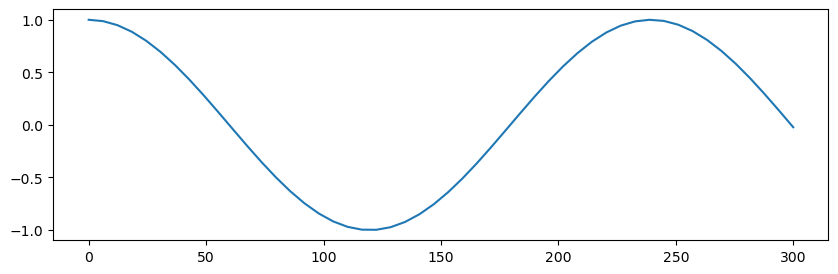

In [7]:
x = np.linspace(0, 300)
plt.plot(x, np.cos(x));

- Note the $x$-axis: it ranges from 0 to 300
- The figure thus cannot show the normal cosine, which has a period from $0$ to $2\pi$
- We plot the same function again, but with higher resolution along the $x$-axis

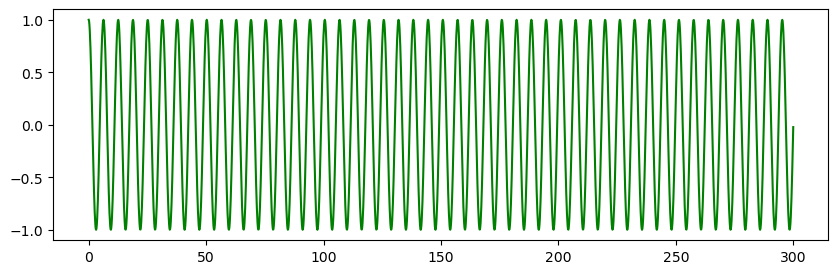

In [8]:
xh = np.linspace(0, 300, num=2000)
plt.plot(xh, np.cos(xh), 'g-');

- We see that there are very many periods of the cosine (to be precise $300/(2\pi)\approx 48$)
- `linspace(0, 300)` has given us only 50 data points along the $x$-axis
- We have drawn only **a single data point per period** in the first figure
- To see this more clearly, we plot the cosine again with few and many points, but only up to 60

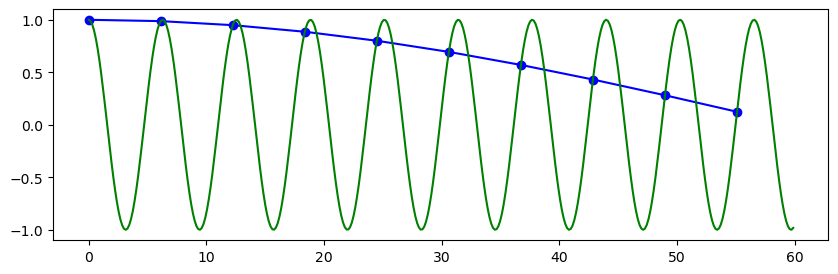

In [9]:
plt.plot(x[x<60], np.cos(x[x<60]), 'bo-')
plt.plot(xh[xh<60], np.cos(xh[xh<60]), 'g-');

- The green line shows the correct cosine function
- The blue dots show the data points we used for plotting the first figure
- The blue line connects the blue dots and is the line we saw in the first figure

**Computers are eminently suited to generate nonsense—you have to use your critical mind!!!**

-------------

# Machine learning with scikit-learn

This section is based on material developed by Oliver Tomic.

- For a proper introduction to machine learning, take [DAT200](https://www.nmbu.no/course/DAT200)
- Textbooks
    - Raschka & Mirjalili, *Python Machine Learning*, https://www.packtpub.com/product/python-machine-learning-third-edition/9781789955750
    - James, Witten, Hastie & Tibshirani, *An Introduction to Statistical Learning*, https://trevorhastie.github.io/ISLR/
- Widely used Python package: [scikit-learn](https://scikit-learn.org/stable/) (`sklearn`)
    - Provides wide range of machine learning methods with common interface
    
## A micro-introduction to [machine learning](https://en.wikipedia.org/wiki/Machine_learning)

* "A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E." — Tom M. Mitchell (1997, quoted from Wikipedia) 
* Task T
    - **Classification**, e.g., recognize handwritten digits
    - **Regression**, e.g., predict energy need tomorrow based on weather forecast
* Performance measure P
    - Number of correct or incorrect classifications
    - Prediction error
* Experience E
    - Data

### Super-minimal process

1. Collect data
1. Initial exploration
    - What is data?
    - Missing data?
    - How does the data look?
    - What task do we want to solve?
1. Split data into training and test data
1. Choose machine learning method and performance measure
1. Train model
1. Test model on test data
1. Evaluate

#### Potential problems

- Training does not improve performance
- Excellent performance on training data, but poor performance on test data
    - Overfitting
    - Lack of generalization
    

### A more comprehensive process

- Feature selection/engineering
    - Which parts of your data should learning algorithm use?
    - Should data be transformed before passing to learning algorithm?
- Hyperparameter search
    - Test different parameters controlling the learning process
    - Requires test data for parameter search plus validation data for test of final result

    
### Two types of machine learning

- Supervised learning
    - Correct answers (labels) are known for test data
    - Create model that can predict answers
- Unsupervised learning
    - No answers (labels) given
    - Attempt to group data according to structure in data
    - Example: Recording with several people talking—group by voice

    
    

### Iris petals—*the* classic classification example

- Published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936
- https://en.wikipedia.org/wiki/Iris_flower_data_set

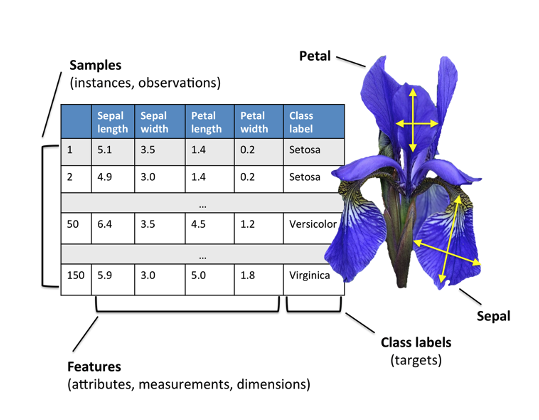

### Supervised learning: can we predict species from petal and sepal measurements?

#### Load necessary packages

**Note** Running the following code requires running `pip install mlxtend`

In [10]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions, scatterplotmatrix
import matplotlib.pyplot as plt

#### Load and inspect Iris data from scikit-learn example data

In [11]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [15]:
print(iris.data[::15, :])

[[5.1 3.5 1.4 0.2]
 [5.7 4.4 1.5 0.4]
 [4.8 3.1 1.6 0.2]
 [4.8 3.  1.4 0.3]
 [5.  2.  3.5 1. ]
 [6.6 3.  4.4 1.4]
 [5.5 2.6 4.4 1.2]
 [7.6 3.  6.6 2.1]
 [6.9 3.2 5.7 2.3]
 [7.7 3.  6.1 2.3]]


In [16]:
print(iris.target[::15])

[0 0 0 0 1 1 1 2 2 2]


- `data` has one row per sample, one column per feature
- `target` says which class each sample belongs to

#### Exploration: Visualise data

In [17]:
def set_labelsize(size):
    plt.rcParams.update({f'{item}.labelsize': size for item in ['axes', 'xtick', 'ytick']})

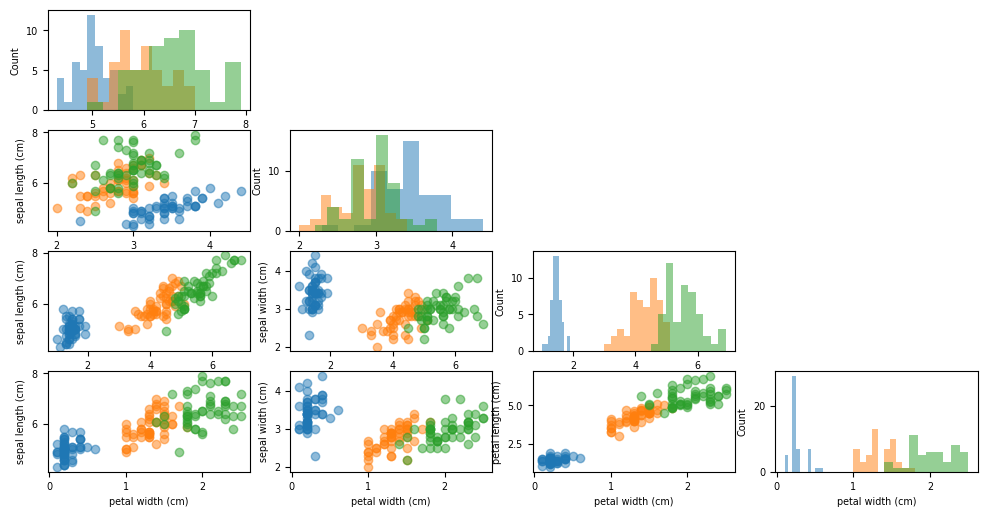

In [18]:
set_labelsize('x-small')
fig, axes = scatterplotmatrix(iris.data[iris.target==0], figsize=(12, 6), alpha=0.5)
fig, axes = scatterplotmatrix(iris.data[iris.target==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(iris.data[iris.target==2], fig_axes=(fig, axes), alpha=0.5, names=iris.feature_names)
set_labelsize('medium')

#### Feature selection

- Work with petal width and length only
- Assign to standard variable names used in ML/sklearn community

In [19]:
X = iris.data[:, 2:]
y = iris.target

#### Test-training split

- 70% training, 30% test data
- Give fixed random seed
- `stratify`: ensure training and test data include same proportion of samples from each class

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=1, stratify=y)

#### Create regressor and perform training (fit)

- We use here [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
- Classic machine learning method
- Tried to find lines (hyperplanes) in $X$ space that divide different the different target groups

In [21]:
lr = LogisticRegression(C=100.0, 
                        random_state=3, 
                        solver='liblinear',
                        multi_class='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=3, solver='liblinear')

#### Plot training and test data

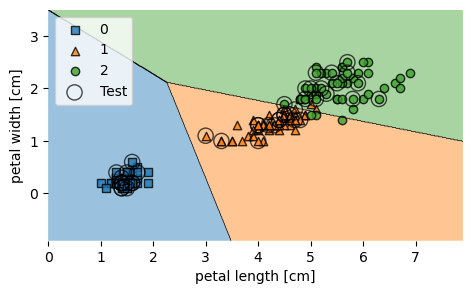

In [22]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined,
                      clf=lr, X_highlight=X_test,
                      scatter_highlight_kwargs={'s': 120, 'label': 'Test', 
                                                'alpha': 0.7, 'c': 'none'});
plt.gca().set_aspect('equal')
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend();

#### Test accuracy

In [23]:
print(f'Accuracy: {lr.score(X_test, y_test):.2f}')

Accuracy: 1.00


- Perfect score
- In this case actually worse for training data
    - test data set is too small

In [24]:
print(f'Accuracy: {lr.score(X_train, y_train):.2f}')

Accuracy: 0.94


#### Make predictions

In [25]:
y_pred = lr.predict(X_test[:5])
y_pred

array([2, 0, 0, 2, 1])

In [26]:
y_pred == y_test[:5]

array([ True,  True,  True,  True,  True])

- All predictions correct
- Translate to names

In [27]:
iris.target_names[y_pred]

array(['virginica', 'setosa', 'setosa', 'virginica', 'versicolor'],
      dtype='<U10')

#### Improvement: scale data before fitting

- Remove mean and scale by standard deviation
- Must build scaler from training data
- Then transform both training and test data
- Scaling often improves performance of learning algorithm

In [28]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
lr_sc = LogisticRegression(C=100.0, random_state=1, 
                           solver='liblinear', multi_class='auto')
lr_sc.fit(X_train_sc, y_train)

LogisticRegression(C=100.0, random_state=1, solver='liblinear')

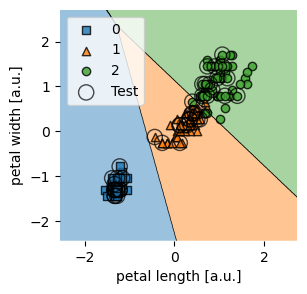

In [29]:
X_combined_sc = np.vstack((X_train_sc, X_test_sc))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_sc, y=y_combined,
                      clf=lr_sc, X_highlight=X_test_sc,
                      scatter_highlight_kwargs={'s': 120, 'label': 'Test', 'alpha': 0.7, 'c': 'none'});
plt.gca().set_aspect('equal')
plt.xlabel('petal length [a.u.]')
plt.ylabel('petal width [a.u.]')
plt.legend();

In [30]:
print(f'Accuracy: {lr_sc.score(X_test_sc, y_test):.2f}')

Accuracy: 0.98


In [31]:
print(f'Accuracy: {lr_sc.score(X_train_sc, y_train):.2f}')

Accuracy: 0.95


### Supervised learning: A different method

- [k-nearest-neighbor (kNN) method](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- A clustering method that classifies based on nearby training samples
- We only need to import the right classifier and run it
    - Minimal extra work beyond logistic regression

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_sc = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_sc.fit(X_train_sc, y_train)

KNeighborsClassifier()

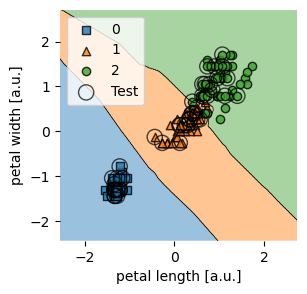

In [34]:
plot_decision_regions(X=X_combined_sc, y=y_combined,
                      clf=knn_sc, X_highlight=X_test_sc,
                      scatter_highlight_kwargs={'s': 120, 'label': 'Test', 'alpha': 0.7, 'c': 'none'});
plt.gca().set_aspect('equal')
plt.xlabel('petal length [a.u.]')
plt.ylabel('petal width [a.u.]')
plt.legend();

- Decision boundaries here are not straight because based on individual data points

In [35]:
print(f'Accuracy: {knn_sc.score(X_test_sc, y_test):.2f}')

Accuracy: 1.00


In [36]:
print(f'Accuracy: {knn_sc.score(X_train_sc, y_train):.2f}')

Accuracy: 0.96


### Unsupervised learning: grouping flowers without labels

- We use a simple method called [Principle Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)
- Idea: Turn coordinate axes so they fit with directions of largest differences in data
- Straightforward with scikit-learn

In [37]:
from sklearn.decomposition import PCA

- We now use all data columns

In [38]:
pca = PCA()
X_pca = pca.fit_transform(iris.data)

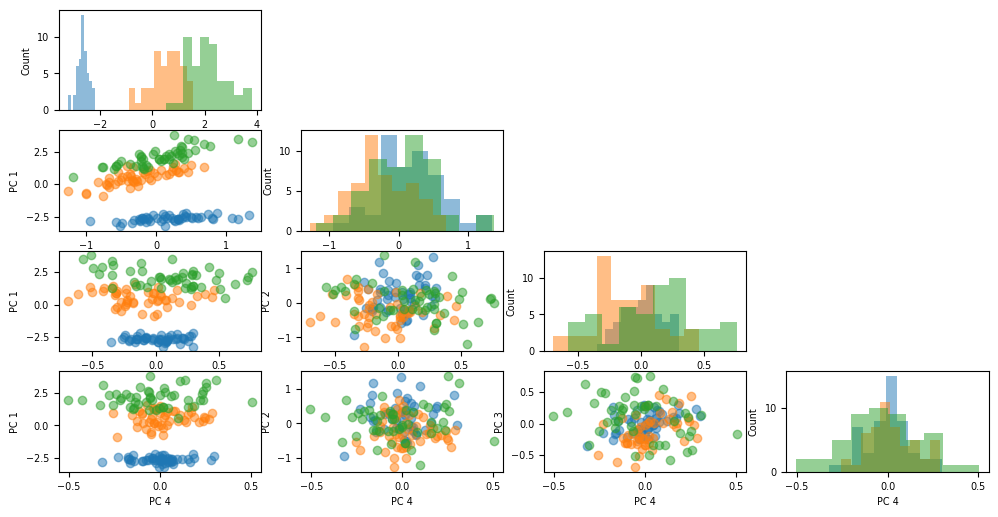

In [39]:
set_labelsize('x-small')
pcs = [f'PC {n+1}' for n in range(X_pca.shape[1])]
fig, axes = scatterplotmatrix(X_pca[iris.target==0], figsize=(12, 6), alpha=0.5)
fig, axes = scatterplotmatrix(X_pca[iris.target==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X_pca[iris.target==2], fig_axes=(fig, axes), alpha=0.5, names=pcs)
set_labelsize('medium')

- We could now apply classification algorithm on PCA-transformed data
    - NB: To do so, we need to train PCA on training data only
    - NB: We could also have scaled data before training PCA

----------------------

# Optimizing Code

One of the key ideas of Agile programming is to proceed as follows (Kent Beck):

1. Get it to work
1. Get it right
1. Get it fast

We have looked at the first two points, now we will turn to getting code fast.

## Why make it fast?
- Users do not like to wait: fast response times
    - E.g. Google: 10x faster than [AltaVista](https://en.wikipedia.org/wiki/AltaVista) and better results
    - Extreme case: [High-frequency trading](https://en.wikipedia.org/wiki/High-frequency_trading) on the stock market
- Science and engineering
    - Short turn-around times allow more experiments
    - Simulation experiments using months or years are often not useful
- Classic example: [US Census](http://www.census.gov/history/www/census_then_now/notable_alumni/herman_hollerith.html)
    - Performed every 10 years (required by US Constitution)
    - 1880 census was only completely evaluated in 1887
    - 1888 competition for automated tabulation
    - Won by Hermann Hollerith, used in 1890 census
    - Machines also used in 1891 Norwegian census
    - Developed into IBM
    
## How to make it fast?
- Use faster hardware
    - Can be costly
    - Not always available
    - Competition will also use faster hardware, so just faster hardware may not be enough
- Improve your software
    - Better algorithms
    - Smarter data structures
    - 90–10 rule: typically, 90% of the time is spent in 10% of the code
- Change your approach
    - An entirely different strategy may provide faster or better results
    
## The pitfalls of optimization
- Wasting time on the wrong things
    - Donald Knuth: "We should forget about small efficiencies, say about 97% of the time: premature optimization is the root of all evil." [Wikipedia](https://en.wikipedia.org/wiki/Program_optimization)
- Trade-offs
    - "There is no such thing as a free lunch"
    - Memory: faster algorithms may need more memory
    - Flexibility: by limiting what code can do, we may make it faster
    - Portability: fine-tuning may make code faster on one machine, but it may no longer run on others
- Correctness
    - Optimization means changing code
    - Changes may break code
    - A thorough test regime needs to be in place *before* optimizing

## Algorithm analysis

### Summing numbers

Task: Compute the sum of all natural numbers up to $n$, i.e., $\sum_{k=1}^{n} k$.

#### Implementations

##### Loop

In [40]:
def sum_n_loop(n):
    s = 0
    for k in range(1, n+1):
        s += k
    return s

##### List comprehension

In [41]:
def sum_n_comp(n):
    return sum(range(1, n+1))

#### Tests

In [42]:
funcs = [sum_n_loop, sum_n_comp]
for func in funcs:
    assert func(1) == 1
    assert func(2) == 3
    assert func(3) == 6

#### Analysis

- How many operations are needed to complete the calculation?
- $n$ loop iterations
    - For each loop iteration
        - $1$ addition
        - $1$ step of the loop counter $k$
- Some operations to start function and return value
- Model of operation count
    - $a$ operations outside loop
    - $b$ operations inside loop for each iteration
    - $\Rightarrow a + b n$ operations
- Rough assumptions
    - All operations take the same time $c$
    - Then total time required: $T(n) \approx c(a+bn)$
    - For $n\gg 1$ we can ignore the constant, so $T(n)\sim n$ 
- The algorithm is *linear* in problem size
- In algorithm analysis, we say that the run-time is of order $n$, $T(n)=\Theta(n)$
- For details, take *INF221 Computer Science for Data Scientists*
    - [Course description](https://www.nmbu.no/course/INF221)

#### Algorithmic improvement

- From mathematics: $$\sum_{k=1}^n k = \frac{n(n+1)}{2}$$

##### Implementation based on analytical solution

In [43]:
def sum_n_ana(n):
    return (n * (n + 1)) / 2

##### Analysis of analytical-solution algorithm

- One addition, one multiplication, on division by $2$ *independent of problem size*
- $\Rightarrow T(n) = \mathrm{const}$ or $T(n)=\Theta(1)$
- Signficant improvement for $n\gg 1$
- Weaknesses
    - operations are only constant in time as long as integer type is fixed size
    - therefore, the analysis above holds strictly only up to a certain $n$

##### Re-run tests for all solutions

In [44]:
funcs = [sum_n_loop, sum_n_comp, sum_n_ana]
for func in funcs:
    assert func(1) == 1
    assert func(2) == 3
    assert func(3) == 6

In [45]:
def bubble_sort(data):
    n = len(data)
    for j in range(n-1, 0, -1):
        for k in range(j):
            if data[k] > data[k + 1]:
                data[k], data[k + 1] = data[k + 1], data[k]

- Outer loop: $n-1$ iterations
- Inner loop: $j$ iterations
    - $1$ comparison
    - possibly $1$ swap
- Total number of inner-loop iterations: 
  $$\sum_{j=1}^{n-1} j=\frac{n(n-1)}{2}\sim n^2 \quad \text{for} \; n\gg 1$$
- Algorithm's run-time is *quadratic* in problem size, $T(n)\sim n^2$ or $T(n)=\Theta(n^2)$

#### Quicksort

- Divide-and-conquer sorting algorithm: subdivide sort into smaller and smaller tasks
- Invented by [C.A.R. Hoare](https://en.wikipedia.org/wiki/Tony_Hoare) around 1959
- Still one of the most used sorting algorithms
- See e.g. [Wikipedia](https://en.wikipedia.org/wiki/Quicksort)
- Basic idea:
    1. Choose a pivot element from the data
    1. Re-order data so that
        - all elements smaller than the pivot are left of the pivot
        - all elements larger than the pivot are right of the pivot
    1. Apply recursively on left and right side

In [46]:
def quicksort(data):
    _quicksort(data, 0, len(data))

def _quicksort(data, left, right):
    if right - left < 2:
        return

    pivot_idx = _partition(data, left, right)
    _quicksort(data, left, pivot_idx)
    _quicksort(data, pivot_idx + 1, right)

def _partition(data, left, right):
    if not left < right:
        return None

    right -= 1  
    pivot_idx = left
    pivot_val = data[pivot_idx]

    data[pivot_idx], data[right] = data[right], data[pivot_idx]
    store_idx = left

    for i in range(left, right):
        if data[i] < pivot_val:
            data[i], data[store_idx] = data[store_idx], data[i]
            store_idx += 1
    data[store_idx], data[right] = data[right], data[store_idx]

    return store_idx

- All work is done in `_partition`
    - one loop of length `right-left` or $n = r-l$
- How do $l$ and $r$ change as recursion progresses?
- Best case:
    - pivot splits data in half every time `_partition()` is called
    - then during recursion: $n \rightarrow n/2 \rightarrow n/4 \rightarrow \dots 1$
    - number of recursions required: $\log_2 n$
    - how often is `_partition` called?
        - top level: 1 time, data length $n$
        - first recursion: 2 times, data length $n/2$ for each
        - second recursion: 4 times, data length $n/4$ for each
        - ...
    - the total number of loop iterations is thus $n$ for each recursion level
    - $\Rightarrow \approx n \log_2 n$ loop iterations
    - Therefore, $T(n) \sim n\log n$ or $T(n)=\Omega(n\log n)$
- Worst case:
    - the first element is the pivot on each recursion
    - each call to `_partition()` returns one empty segement and one segment shorter by 1 only
    - number of recursions required: $n-1$
    - data lengths for recursions $n, n-1, n-2, \dots$
    - Therefore $T(n) \sim n^2$ or $T(n)=O(n^2)$
    - The algorithm is *quadratic*
- Illustrates importance of considering *best case*, *worst case* and *average case*.

#### We quickly look at runtimes

In [47]:
%timeit sum_n_loop(1000000)
%timeit sum_n_loop(1000000)
%timeit sum_n_loop(1000000)

50.7 ms ± 357 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.8 ms ± 715 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.9 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%timeit sum_n_comp(1000000)
%timeit sum_n_comp(1000000)
%timeit sum_n_comp(1000000)

14.2 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.3 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.3 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- We see some variation in run-times between repetitions
- Note that timeit automatically adjust the number of loops to ensure reliable results

In [49]:
%timeit sum_n_ana(1000000)
%timeit sum_n_ana(1000000)
%timeit sum_n_ana(1000000)

126 ns ± 3.35 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
123 ns ± 2.32 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
127 ns ± 5.36 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


- Analytical approch is more that 100.000 times faster!